SUMBER ::

https://www.dicoding.com/academies/184/tutorials/8397

https://machinelearning.mipa.ugm.ac.id/2018/07/28/random-forest/

https://www.youtube.com/watch?v=2e0A0afkj4U




## **DECISION TREE CONCEPT**



1.   CLASSIFICATON DECISION TREE => decision tree predic berdasarkan kategori

2.  REGRESSION DECISION TREE  => decision tree predic berdasarkan numerik value 




DECISION TREE => mengubah tumpukan data menjadi sebuah pohon keputusan yang 

1.   List item

1.   List item
2.   List item


2.   List item

mempresentasikan atura-aturan dari sebuah keputusan. 
- (POHON KEPUTUSAN) satu algoritma supervised learning yang dapat dipakai untuk masalah klasifikasi dan regresi. Decision tree memprediksi sebuah kelas (klasifikasi) atau nilai (regresi) berdasarkan aturan-aturan yang dibentuk setelah mempelajari data. 

- Manfaat utama dari penggunaan decision tree adalah kemampuannya untuk mem-break down proses pengambilan keputusan yang kompleks menjadi lebih simple, sehingga pengambil keputusan akan lebih menginterpretasikan solusi dari permasalahan.

--------------------------------------------------------------------------------
leaf node => hasil akhir dari klasifikasi 
internal node => input 1, output 2 atau lebih .

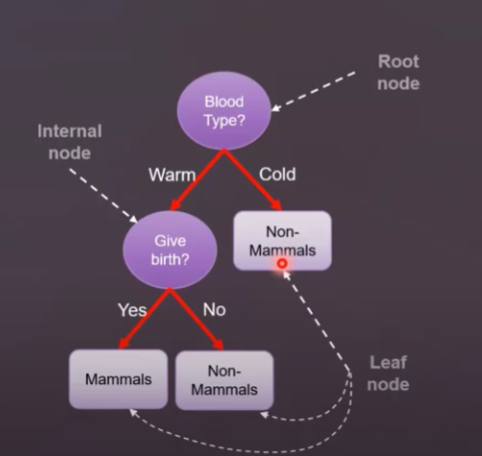


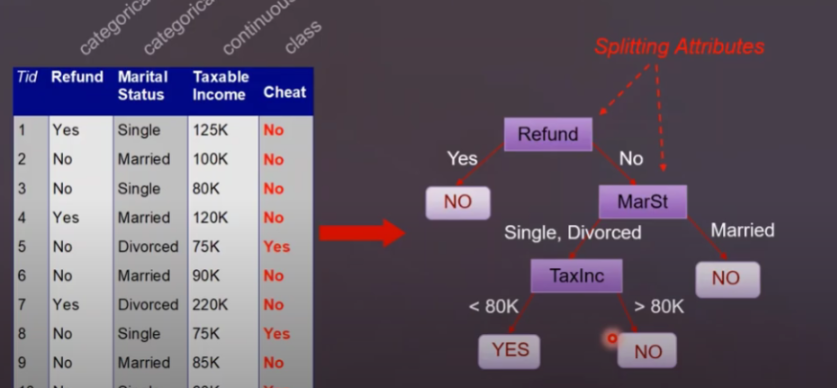

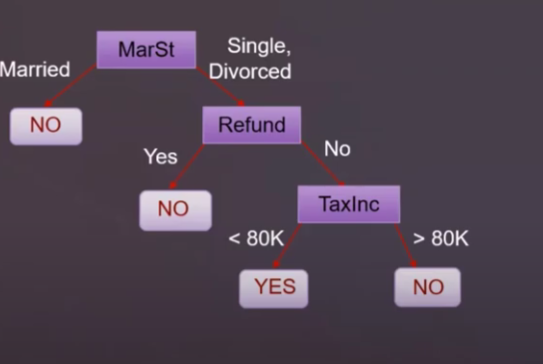

penerapan dalam machine learning misalkan diprediksi dengan adanya data yang baru ? gimana ?

-> setelah tadi kita dalam prosess learning, dan mendapatkan pola maka langkah selanjutnya yaitu model prediksi data baru.

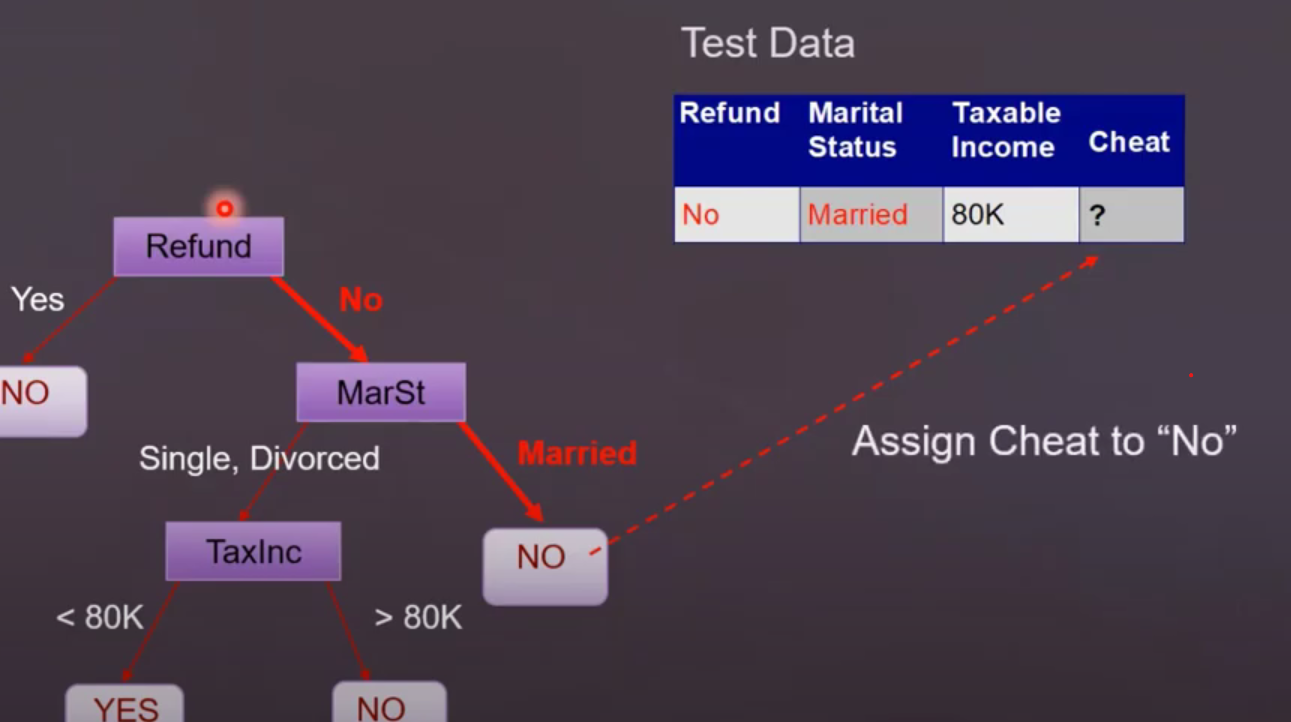

##############

penjelasan optimisasi best dengan gini impurity : https://www.youtube.com/watch?v=_L39rN6gz7Y **bold text**

## **RANDOM FOREST CONCEPT**

- Penggunaan decision tree agar dapat menghindari overfitting pada sebuah set data saat mencapai akurasi yang maksimum

RANDOM FOREST => Sama seperti decision tree, tiap data training akan dibagi menjadi beberapa sampling dan akan di training sendiri secara rando untuk membentuk sebuah pola dan dimodelkan.

----------------------------------------------------------------------------

penerapan : 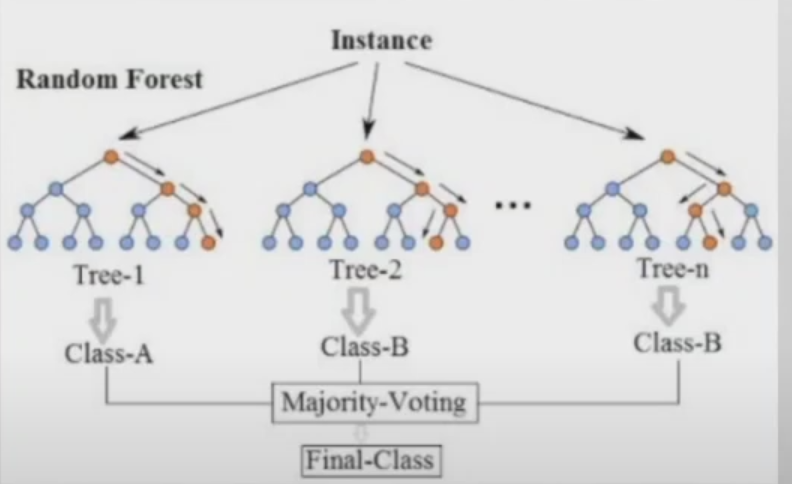

inputan instance akan masuk kedalam tree sampling yang sudah ditraining dari ke-3 tree dan akan di voting mana yang menjadi pilihan terbaik pada ke-3 tree tersebut.



1.   Random forest  adalah kombinasi dari  masing – masing tree yang baik kemudian dikombinasikan  ke dalam satu modeL
2.   Random Forest bergantung pada sebuah nilai vector random dengan distribusi yang sama pada semua pohon yang masing masing decision tree memiliki kedalaman yang maksimal
3.  Random forest adalah classifier yang terdiri dari classifier yang berbentuk pohon {h(x, θ k ), k = 1, . . .} dimana θk adalah random vector yang diditribusikan secara independen dan masing masing tree pada sebuah unit kan memilih class yang paling popular pada input x



https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&list=LL&index=4&t=12s

https://www.youtube.com/watch?v=yKovaQ6tyV8&list=PL2O3HdJI4voHNEv59SdXKRQVRZAFmwN9E&index=17

## **DECISION TREE CODING CLASSIFICATION**

In [ ]:
!pip install -U imbalanced-learn 

     |████████████████████████████████| 206 kB 14.0 MB/s 
     |████████████████████████████████| 23.1 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
data_train = pd.read_csv('datatrain.csv')
data_test = pd.read_csv('datatest.csv')



In [ ]:
data_train[data_train['stroke'] == 1]

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok,stroke
27,100027,Laki-laki,45,ya,tidak,belum,swasta,Perkotaan,240.68,39.0,perokok aktif,1
59,100059,Perempuan,78,tidak,tidak,sudah,swasta,Perkotaan,67.29,24.6,tidak,1
246,100246,Perempuan,68,ya,tidak,belum,Wirausaha,Perkotaan,79.79,29.7,tidak,1
297,100297,Laki-laki,68,ya,tidak,sudah,swasta,Perkotaan,84.73,28.3,perokok aktif,1
311,100311,Perempuan,38,tidak,ya,sudah,swasta,Perkotaan,65.99,23.1,mantan perokok,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27776,127776,Laki-laki,81,tidak,tidak,sudah,Wirausaha,Perkotaan,99.33,33.7,tidak,1
27815,127815,Perempuan,68,ya,ya,sudah,swasta,Perkotaan,247.51,40.5,mantan perokok,1
27831,127831,Laki-laki,70,tidak,tidak,sudah,Wirausaha,Perkotaan,77.14,25.1,perokok aktif,1
27926,127926,Laki-laki,79,tidak,tidak,sudah,swasta,Perkotaan,83.10,30.9,tidak,1


In [ ]:
data_train.items

<bound method DataFrame.items of        id_pasien jenis_kelamin  umur  ...   bmi         merokok stroke
0         100000     Laki-laki    43  ...  26.1  mantan perokok      0
1         100001     Perempuan    58  ...  21.2           tidak      0
2         100002     Laki-laki    29  ...  29.7           tidak      0
3         100003     Laki-laki    54  ...  27.7           tidak      0
4         100004     Laki-laki    78  ...  36.3  mantan perokok      0
...          ...           ...   ...  ...   ...             ...    ...
28070     128070     Laki-laki    62  ...  27.4  mantan perokok      0
28071     128071     Laki-laki    79  ...  34.0  mantan perokok      0
28072     128072     Perempuan    60  ...  28.2           tidak      0
28073     128073     Perempuan    29  ...  25.1  mantan perokok      0
28074     128074     Laki-laki    29  ...  28.7   perokok aktif      0

[28075 rows x 12 columns]>

In [ ]:
data_test.head(5)

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok
0,2000,Laki-laki,24,tidak,tidak,belum,belum bekerja,Perkotaan,83.45,25.3,tidak
1,2001,Perempuan,81,tidak,tidak,sudah,swasta,Perkotaan,127.35,35.6,mantan perokok
2,2002,Laki-laki,41,tidak,tidak,sudah,PNS,Pedesaan,65.00,21.0,perokok aktif
3,2003,Laki-laki,30,tidak,tidak,sudah,Wirausaha,Perkotaan,88.30,32.0,tidak
4,2004,Laki-laki,50,ya,tidak,sudah,Wirausaha,Perkotaan,63.15,25.1,tidak


In [ ]:
#check null and missing value
#data train
data_train.isnull().sum()


id_pasien               0
jenis_kelamin           0
umur                    0
hipertensi              0
penyakit_jantung        0
sudah_menikah           0
jenis_pekerjaan         0
jenis_tempat_tinggal    0
rata2_level_glukosa     0
bmi                     0
merokok                 0
stroke                  0
dtype: int64

In [ ]:
#data test
data_test.isnull().sum()

id_pasien               0
jenis_kelamin           0
umur                    0
hipertensi              0
penyakit_jantung        0
sudah_menikah           0
jenis_pekerjaan         0
jenis_tempat_tinggal    0
rata2_level_glukosa     0
bmi                     0
merokok                 0
dtype: int64

In [ ]:
#data test

data_test.isna().sum()

id_pasien               0
jenis_kelamin           0
umur                    0
hipertensi              0
penyakit_jantung        0
sudah_menikah           0
jenis_pekerjaan         0
jenis_tempat_tinggal    0
rata2_level_glukosa     0
bmi                     0
merokok                 0
dtype: int64

In [ ]:
#data train
data_train.isna().sum()

id_pasien               0
jenis_kelamin           0
umur                    0
hipertensi              0
penyakit_jantung        0
sudah_menikah           0
jenis_pekerjaan         0
jenis_tempat_tinggal    0
rata2_level_glukosa     0
bmi                     0
merokok                 0
stroke                  0
dtype: int64

In [ ]:
data_train.describe(include='all')

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok,stroke
count,28075.00000,28075,28075.000000,28075,28075,28075,28075,28075,28075.000000,28075.000000,28075,28075.000000
unique,NaN,2,NaN,2,2,2,4,2,NaN,NaN,3,NaN
top,NaN,Perempuan,NaN,tidak,tidak,sudah,swasta,Perkotaan,NaN,NaN,tidak,NaN
freq,NaN,17232,NaN,24972,26628,20937,18311,14084,NaN,NaN,15255,NaN
mean,114037.00000,NaN,47.576064,NaN,NaN,NaN,NaN,NaN,106.312906,30.059117,NaN,0.013642
std,8104.69874,NaN,18.706353,NaN,NaN,NaN,NaN,NaN,45.129944,7.199859,NaN,0.116002
min,100000.00000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,55.010000,10.100000,NaN,0.000000
25%,107018.50000,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,77.660000,25.000000,NaN,0.000000
50%,114037.00000,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,92.140000,28.900000,NaN,0.000000
75%,121055.50000,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,113.850000,33.900000,NaN,0.000000


In [ ]:
data_test.describe(include='all')

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok
count,990.000000,990,990.000000,990,990,990,990,990,990.000000,990.000000,990
unique,NaN,2,NaN,2,2,2,4,2,NaN,NaN,3
top,NaN,Perempuan,NaN,tidak,tidak,sudah,swasta,Perkotaan,NaN,NaN,tidak
freq,NaN,589,NaN,811,873,805,627,502,NaN,NaN,517
mean,2494.500000,NaN,50.515152,NaN,NaN,NaN,NaN,NaN,109.035414,29.928990,NaN
std,285.932684,NaN,19.266091,NaN,NaN,NaN,NaN,NaN,49.093831,7.026756,NaN
min,2000.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,55.200000,14.300000,NaN
25%,2247.250000,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,76.937500,24.825000,NaN
50%,2494.500000,NaN,51.500000,NaN,NaN,NaN,NaN,NaN,91.560000,28.900000,NaN
75%,2741.750000,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,118.367500,33.775000,NaN


In [ ]:
#check duplicates
data_train[data_train["id_pasien"].duplicated(keep=False)].head(100)

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok,stroke


In [ ]:
data_test[data_test["id_pasien"].duplicated(keep=False)].head(100)

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok


In [ ]:
#menghilangkan missing value dengan 0

data_train_fillna = data_train.fillna(0)
data_test_fillna = data_test.fillna(0)

#sort data berdasarkan ID PASIEN
data_train_sort = data_train_fillna.sort_values('id_pasien')
data_test_sort = data_test_fillna.sort_values('id_pasien')

#jika ada duplicate, pilih paling bawah
data_train = data_train_sort.iloc[data_train['id_pasien'].drop_duplicates(keep='last').index]
data_test  = data_test_sort.iloc[data_test['id_pasien'].drop_duplicates(keep='last').index]


In [ ]:
#ubah menjadi angka 
label_convert_to_angka_train = pd.get_dummies(data_train[['jenis_kelamin', 'hipertensi', 'penyakit_jantung', 'jenis_pekerjaan', 'sudah_menikah', 'jenis_tempat_tinggal', 'merokok']])
label_convert_to_angka_test = pd.get_dummies(data_test[['jenis_kelamin', 'hipertensi', 'penyakit_jantung', 'jenis_pekerjaan', 'sudah_menikah', 'jenis_tempat_tinggal', 'merokok']])

label_convert_to_angka_train

,jenis_kelamin_Laki-laki,jenis_kelamin_Perempuan,hipertensi_tidak,hipertensi_ya,penyakit_jantung_tidak,penyakit_jantung_ya,jenis_pekerjaan_PNS,jenis_pekerjaan_Wirausaha,jenis_pekerjaan_belum bekerja,jenis_pekerjaan_swasta,sudah_menikah_belum,sudah_menikah_sudah,jenis_tempat_tinggal_Pedesaan,jenis_tempat_tinggal_Perkotaan,merokok_mantan perokok,merokok_perokok aktif,merokok_tidak
0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0
1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1
2,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1
3,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1
4,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28070,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0
28071,1,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0
28072,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
28073,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0


In [ ]:
#gabungkan lagi 

data_train_concat = pd.concat([data_train['rata2_level_glukosa'], data_train['umur'], data_train['bmi'], label_convert_to_angka_train], axis=1, join='inner')
data_test_concat = pd.concat([data_test['rata2_level_glukosa'], data_test['umur'], data_train['bmi'], label_convert_to_angka_train], axis=1, join='inner')
data_train_concat

,rata2_level_glukosa,umur,bmi,jenis_kelamin_Laki-laki,jenis_kelamin_Perempuan,hipertensi_tidak,hipertensi_ya,penyakit_jantung_tidak,penyakit_jantung_ya,jenis_pekerjaan_PNS,jenis_pekerjaan_Wirausaha,jenis_pekerjaan_belum bekerja,jenis_pekerjaan_swasta,sudah_menikah_belum,sudah_menikah_sudah,jenis_tempat_tinggal_Pedesaan,jenis_tempat_tinggal_Perkotaan,merokok_mantan perokok,merokok_perokok aktif,merokok_tidak
0,96.39,43,26.1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0
1,114.07,58,21.2,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1
2,118.96,29,29.7,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1
3,73.01,54,27.7,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1
4,243.82,78,36.3,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28070,113.78,62,27.4,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0
28071,127.96,79,34.0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0
28072,61.06,60,28.2,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
28073,108.14,29,25.1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0


In [ ]:
#scaling data pada umur, rata2level_glukosa dan bmi karena perbandingan data terlalu besar
Scaler = MinMaxScaler()

data_scaling_train = data_train_concat[['rata2_level_glukosa', 'umur', 'bmi']]
data_scaling_test  = data_test_concat[['rata2_level_glukosa', 'umur', 'bmi']]

training_scaler =  Scaler.fit_transform(data_scaling_train)
testing_scaler     = Scaler.fit_transform(data_scaling_test)
training_scaler



array([[0.17530927, 0.45833333, 0.1953602 ],
       [0.25021183, 0.66666667, 0.13553114],
       [0.27092866, 0.26388889, 0.23931624],
       ...,
       [0.02563125, 0.69444444, 0.22100122],
       [0.22508897, 0.26388889, 0.18315018],
       [0.05965091, 0.26388889, 0.22710623]])

In [ ]:
#labeling data yang di scaler

attribute = ['rata2_level_glukosa', 'umur', 'bmi']
data_labeling_training = pd.DataFrame(training_scaler, columns=attribute)
data_labeling_testing = pd.DataFrame(testing_scaler, columns=attribute)
data_labeling_training


,rata2_level_glukosa,umur,bmi
0,0.175309,0.458333,0.195360
1,0.250212,0.666667,0.135531
2,0.270929,0.263889,0.239316
3,0.076258,0.611111,0.214896
4,0.799907,0.944444,0.319902
...,...,...,...
28070,0.248983,0.722222,0.211233
28071,0.309058,0.958333,0.291819
28072,0.025631,0.694444,0.221001
28073,0.225089,0.263889,0.183150


In [ ]:
#ganti semua data yang sudah di scaler

#data training
data_train_concat['rata2_level_glukosa'] = data_labeling_training['rata2_level_glukosa']
data_train_concat['umur'] = data_labeling_training['umur']
data_train_concat['bmi'] = data_labeling_training['bmi']

#data testing
data_test_concat['rata2_level_glukosa'] = data_labeling_testing['rata2_level_glukosa']
data_test_concat['umur'] = data_labeling_testing['umur']
data_test_concat['bmi'] = data_labeling_testing['bmi']

data_test_concat

,rata2_level_glukosa,umur,bmi,jenis_kelamin_Laki-laki,jenis_kelamin_Perempuan,hipertensi_tidak,hipertensi_ya,penyakit_jantung_tidak,penyakit_jantung_ya,jenis_pekerjaan_PNS,jenis_pekerjaan_Wirausaha,jenis_pekerjaan_belum bekerja,jenis_pekerjaan_swasta,sudah_menikah_belum,sudah_menikah_sudah,jenis_tempat_tinggal_Pedesaan,jenis_tempat_tinggal_Perkotaan,merokok_mantan perokok,merokok_perokok aktif,merokok_tidak
0,0.135739,0.194444,0.297297,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0
1,0.346675,0.986111,0.186937,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1
2,0.047088,0.430556,0.378378,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1
3,0.159043,0.277778,0.333333,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1
4,0.038199,0.555556,0.527027,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.044349,0.736111,0.382883,0,1,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0
986,0.024121,1.000000,0.549550,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1
987,0.005814,0.333333,0.153153,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0
988,0.225399,0.138889,0.369369,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0


In [ ]:
data_train['stroke'].value_counts() 

0    27692
1      383
Name: stroke, dtype: int64

In [ ]:
#masukan feature dan target yang akan di split
feature = data_train_concat
target  = data_train['stroke']

#upload untuk di deploy datanya dari data training
feature_test_upload = data_test_concat

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state = 42)

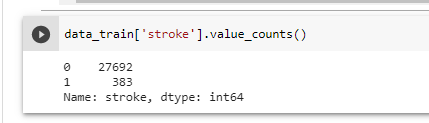

dari gambar diatas, yang terkena stroke perbedaan datanya tidak seimbang dengan yg tidak kena stroke, maka dilakukanlah imbalancing.

In [ ]:
smote = SMOTE(random_state=42)
x_balance, y_balance = smote.fit_resample(x_train,y_train)


In [ ]:
#prediksi model

model = DecisionTreeClassifier()
model.fit(x_balance, y_balance)

DecisionTreeClassifier()

In [ ]:
#hasil prediksi
hasil_prediksi = model.predict(x_test)
hasil_prediksi

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
!pip install -q pydot

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail18 amd64 2.24.32-1ubuntu1 [14.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgail-common amd64 2.24.32

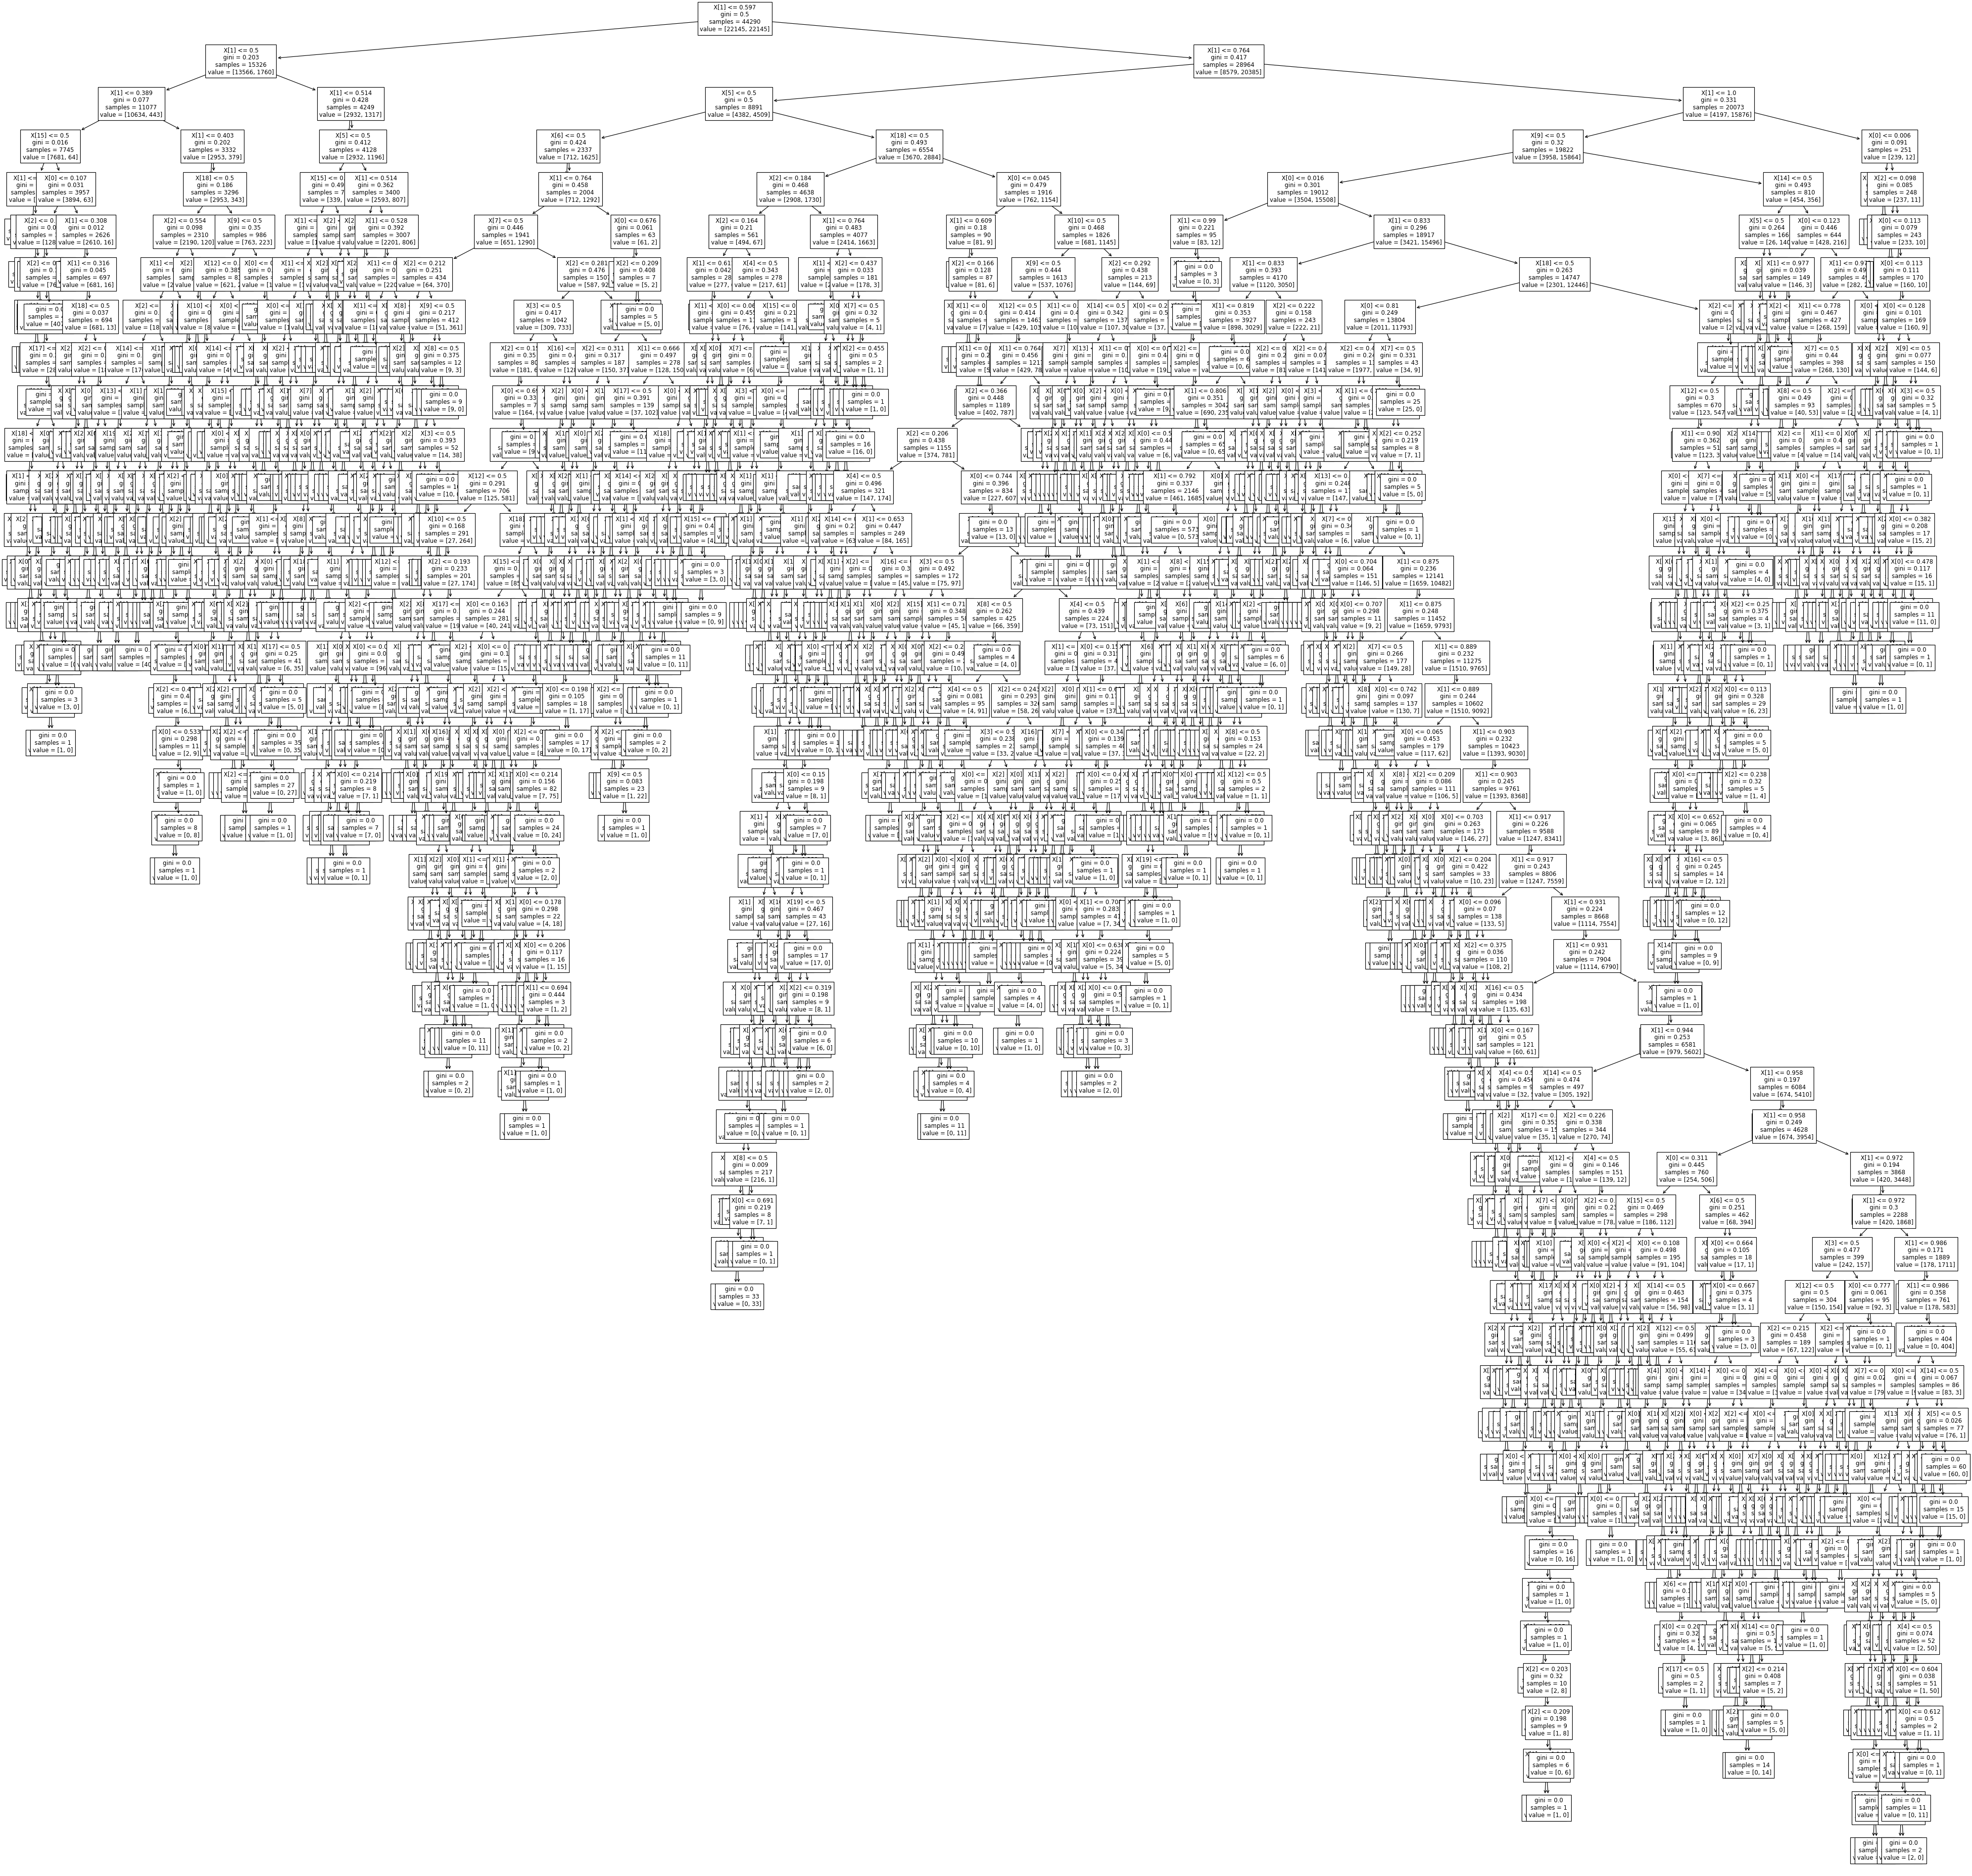

In [ ]:
from sklearn import tree
plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(50,50))
tree.plot_tree(model, fontsize=10)
plt.show() #kelemahan dari decision tree, jika memiliki feature yang banyak, maka data akan lebih complex

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    model,
    out_file = "stroke_1.dot",
    feature_names = ['rata2_level_glukosa',	'umur',	'bmi',	'jenis_kelamin_Laki-laki',	'jenis_kelamin_Perempuan',	'hipertensi_tidak',	'hipertensi_ya',	'penyakit_jantung_tidak',	'penyakit_jantung_ya',	'jenis_pekerjaan_PNS',	'jenis_pekerjaan_Wirausaha',	'jenis_pekerjaan_belum bekerja',	'jenis_pekerjaan_swasta',	'sudah_menikah_belum',	'sudah_menikah_sudah',	'jenis_tempat_tinggal_Pedesaan',	'jenis_tempat_tinggal_Perkotaan',	'merokok_mantan_perokok',	'merokok_perokok aktif',	'merokok_tidak'],
    class_names = ['tidak stroke', 'stroke'],
    rounded= True,
    filled =True
)

In [ ]:
import pydot

(graph,) = pydot.graph_from_dot_file('stroke_1.dot')
graph.write_png('stroke_valid.png')

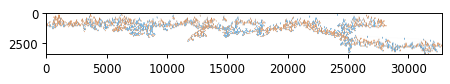

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('stroke_valid.png')
plt.imshow(img)

In [ ]:
#evaluasi 
print(accuracy_score(y_test, hasil_prediksi))

0.9561887800534283


In [ ]:
from sklearn.metrics import classification_report

print("\n IMBALANCE - DECISION TREE")
print(classification_report(y_test, hasil_prediksi))



 IMBALANCE - DECISION TREE
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5547
           1       0.03      0.09      0.05        68

    accuracy                           0.96      5615
   macro avg       0.51      0.53      0.51      5615
weighted avg       0.98      0.96      0.97      5615



In [ ]:
#membuat dataframe kosong untuk mengumpulkan tugas
upload = pd.DataFrame()

#buat kolom id_pasien dari data test
datatest = data_test
upload['id_pasien'] = datatest['id_pasien']


#lakukan prediksi terhadap datatest yang sudah di bersihkan pada langkah 3E
upload['stroke'] = model.predict(feature_test_upload)
upload.to_csv('deployment_Data.csv', index=False)
print(upload)

#render dataframe kumpulKaggle dengan nama siapKumpul.c

     id_pasien  stroke
0         2000       0
1         2001       0
2         2002       0
3         2003       0
4         2004       0
..         ...     ...
985       2985       0
986       2986       0
987       2987       0
988       2988       0
989       2989       0

[990 rows x 2 columns]


In [ ]:
######################################################### DECISION TREE PADA IRIS SENTOSA ###########################################################


### **IRIS DATASET DECISION TREE**


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
feature, target = load_iris(return_X_y=True)

In [ ]:
attribute = ['sepal lenght', 'sepal width', 'petal lenght', 'petal width']
feature_columns = pd.DataFrame(feature, columns=attribute)
feature_columns

,sepal lenght,sepal width,petal lenght,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_columns, target, test_size=0.3, random_state=0)

In [ ]:
x_train.shape

(105, 4)

In [ ]:
y_train.shape

(105,)

In [ ]:
model_v1 = DecisionTreeClassifier()
model_v1.fit(x_train, y_train)

DecisionTreeClassifier()

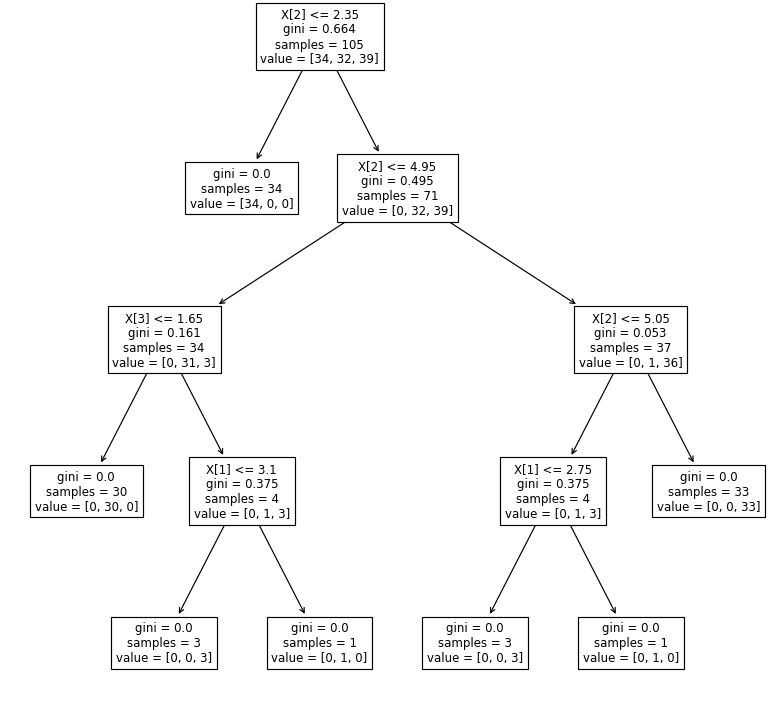

In [ ]:
from sklearn import tree
plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10,10))
tree.plot_tree(model_v1, fontsize=10)
plt.show() #kelemahan dari decision tree, jika memiliki feature yang banyak, maka data akan lebih complex

In [ ]:
#prediksi data x_test iris sentosa

prediksi_v1 = model_v1.predict(x_test)
prediksi_x_test_decision_tree = x_test



In [ ]:
prediksi_x_test_decision_tree['hasil prediksi'] = prediksi_v1

In [ ]:
prediksi_x_test_decision_tree['hasil prediksi'].replace([0,1,2], ['bunga iris sentosa', 'bunga iris verticolos', 'bunga iris virginica'], inplace=True)

In [ ]:
prediksi_x_test_decision_tree.head(5)

,sepal lenght,sepal width,petal lenght,petal width,hasil prediksi
114,5.8,2.8,5.1,2.4,bunga iris virginica
62,6.0,2.2,4.0,1.0,bunga iris verticolos
33,5.5,4.2,1.4,0.2,bunga iris sentosa
107,7.3,2.9,6.3,1.8,bunga iris virginica
7,5.0,3.4,1.5,0.2,bunga iris sentosa


In [ ]:
#uji data baru

prediksi_data_baru = model_v1.predict([['5.7','3.8','1.7','0.6']])

if prediksi_data_baru[0] == 0 :
  print('hasil prediksi yaitu bunga iris sentosa ')
elif prediksi_data_baru[0] == 1 :
   print('hasil prediksi yaitu  bunga iris verticolos ')
elif prediksi_data_baru[0] == 2 :
   print('hasil prediksi yaitu bunga iris virginica')
 
 #### dari hasil prediksi benar !. 

hasil prediksi yaitu bunga iris sentosa 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediksi_v1)

0.9777777777777777

In [ ]:
#evaluasi data iris training ! . 
from sklearn.metrics import classification_report
print(classification_report(y_test, prediksi_v1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### **IRIS DATASET RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_v2 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42) #melatih 100 buah model decision tree !
model_v2.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#menghapus columns prediksi dari decision tree untuk prediksi pada random forest
x_test_random_forests = prediksi_x_test_decision_tree.drop(columns=['hasil prediksi'])
x_test_random_forests.head(5)

,sepal lenght,sepal width,petal lenght,petal width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [ ]:
prediksi_v2 = model_v2.predict(x_test_random_forests)
x_test_random_forests['hasil prediksi'] = prediksi_v2

In [ ]:
x_test_random_forests['hasil prediksi'].replace([0,1,2], ['bunga iris sentosa', 'bunga iris verticolos', 'bunga iris virginica'], inplace=True)
x_test_random_forests.head(5)

#dari perbandingan hasil dari decision tree dan random forest mendapatkan hasil prediksi yang sama.

,sepal lenght,sepal width,petal lenght,petal width,hasil prediksi
114,5.8,2.8,5.1,2.4,bunga iris virginica
62,6.0,2.2,4.0,1.0,bunga iris verticolos
33,5.5,4.2,1.4,0.2,bunga iris sentosa
107,7.3,2.9,6.3,1.8,bunga iris virginica
7,5.0,3.4,1.5,0.2,bunga iris sentosa


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediksi_v2)

0.9777777777777777

In [ ]:
#evaluasi data iris training ! . 
from sklearn.metrics import classification_report
print(classification_report(y_test, prediksi_v2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**NOTE** : **dari hasil perbandingan classifikasi antara decision tree dan random forest menghasilkan akurasi score yang sama**